<a href="https://colab.research.google.com/github/alexalexs/gif_poster/blob/master/gif_poster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
# !pip install  Pillow
!git clone https://github.com/alexalexs/gif_poster.git

fatal: destination path 'gif_poster' already exists and is not an empty directory.


In [104]:
from PIL import Image, ImageFilter, ImageOps, ImageDraw, ImageChops, ImageEnhance
from IPython.display import display 
import numpy as np
import matplotlib.pyplot as plt
import io
from collections import deque
import numpy as np
import cv2
from scipy.optimize import nnls
import os

In [106]:
src_ = 'out'
img = Image.open("gif_poster/Matricaria.jpeg") 

In [107]:
canvas_1 = Image.open(
    "gif_poster/structure.jpg")
img.save("file.png", "PNG")
canvas_ = Image.open("gif_poster/canvas.jpg")

img = Image.open('file.png')


In [108]:
rat = max(img.size)/1000
round(rat)


4

In [109]:
img = img.resize((round(img.size[0]/rat), round(img.size[1]/rat)))


In [110]:
canvas_ = canvas_.crop((0, 0, img.size[0], img.size[1]))
canvas_1 = canvas_1.crop((0, 0, img.size[0], img.size[1]))


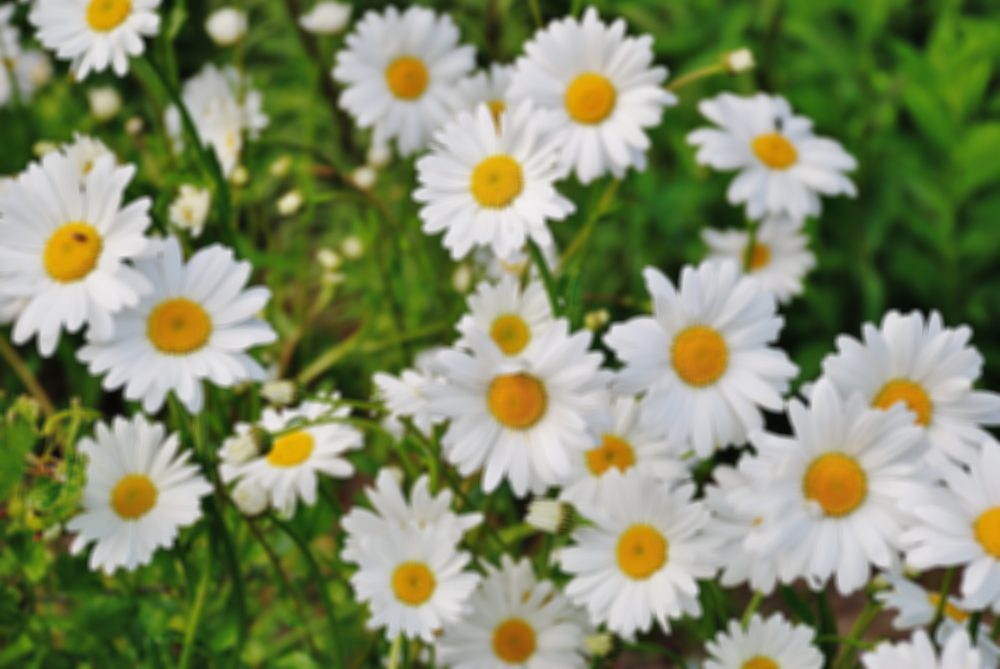

In [111]:
img0 = img.filter(ImageFilter.BoxBlur(radius=3))
display(img0)


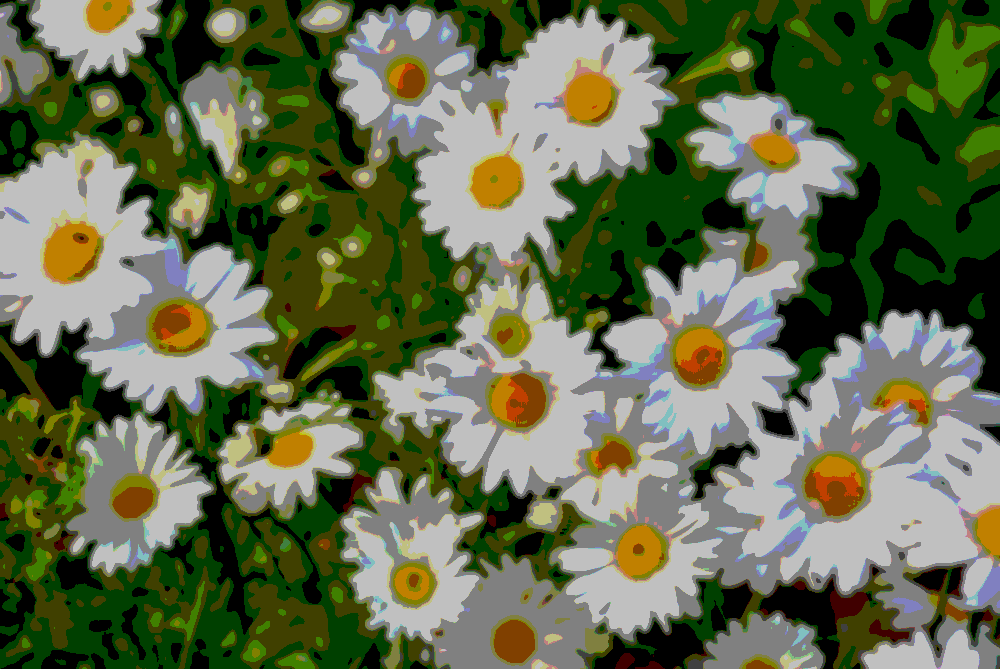

In [112]:
img24 = ImageOps.posterize(img0, 1)
img4 = ImageOps.posterize(img0, 2)
display(img4)


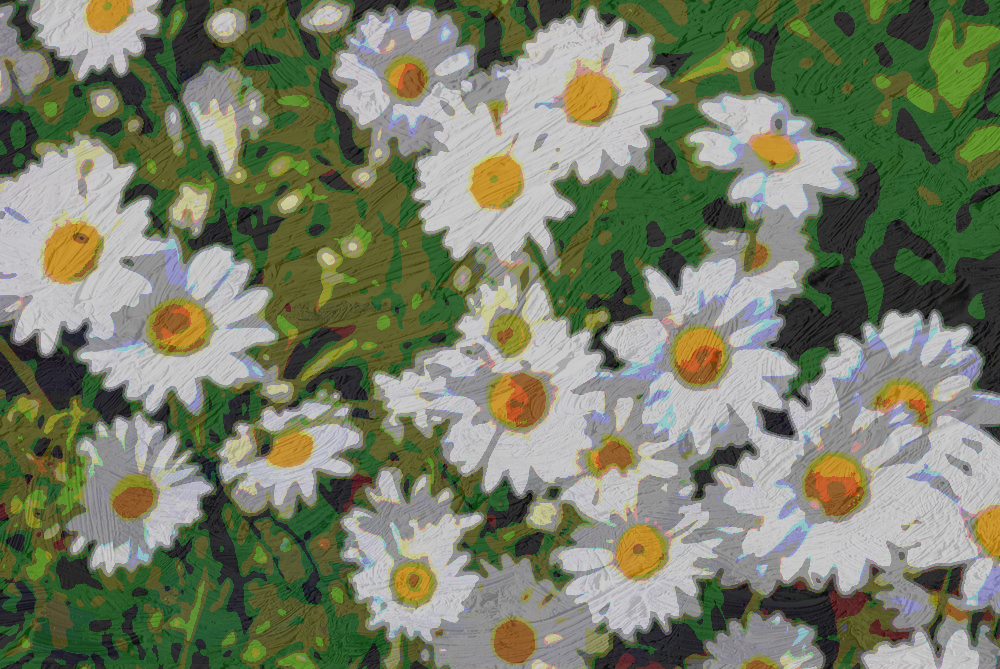

In [66]:
enhancer = ImageEnhance.Color(canvas_1)
canvas_1 = enhancer.enhance(5)
result = Image.blend(img4.convert('RGBA'), canvas_1.convert('RGBA'), alpha=0.2)
display(result)


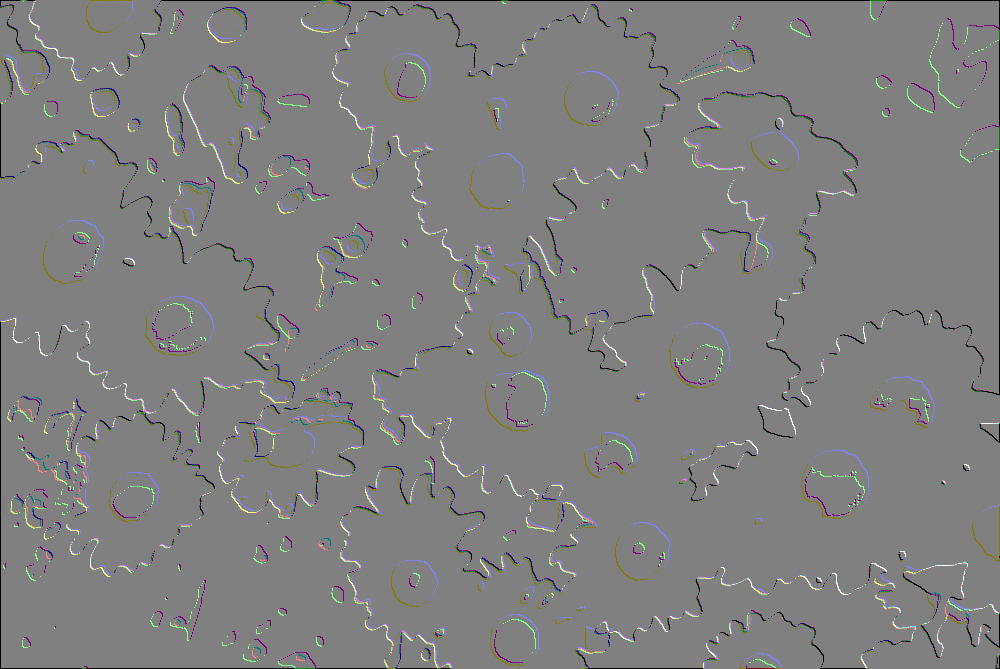

In [67]:
img61 = img24.filter(ImageFilter.EMBOSS)

img61.convert('RGBA')


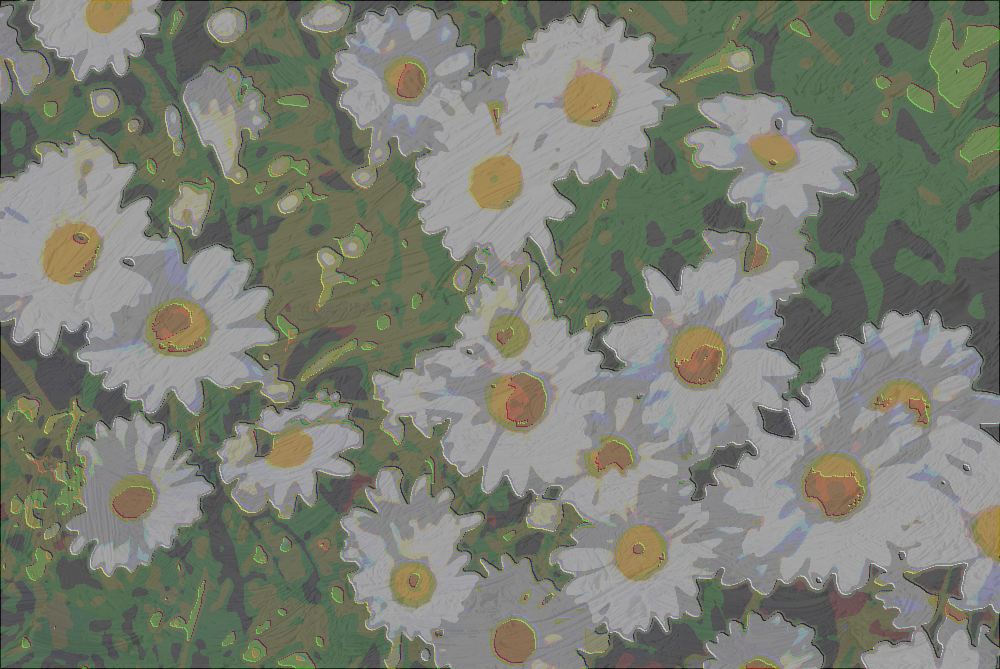

In [68]:
result1 = Image.blend(result.convert('RGBA'), img61.convert('RGBA'), alpha=0.5)
display(result1)


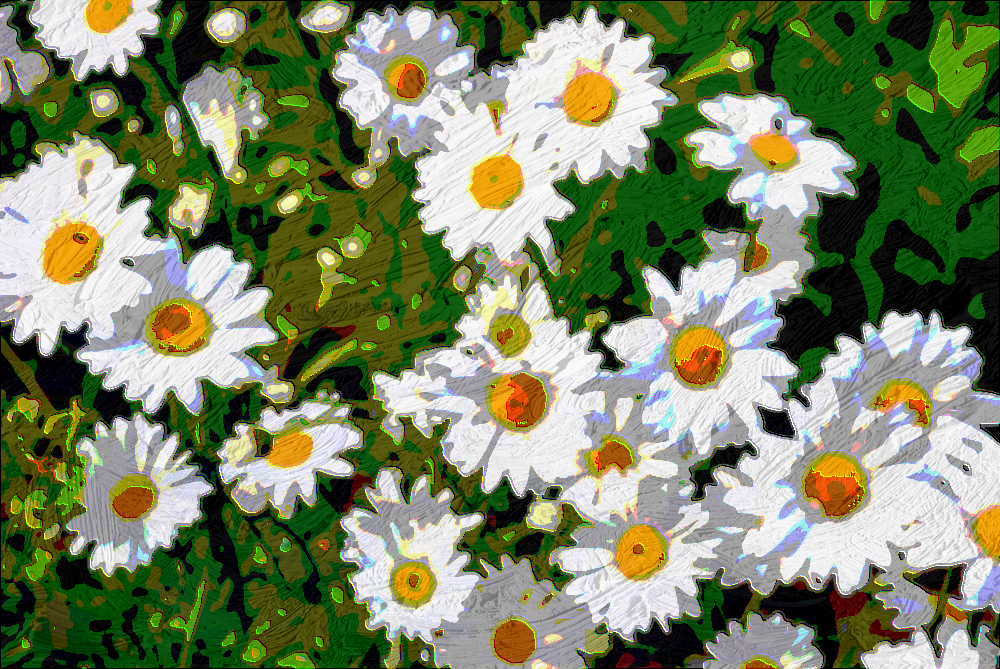

In [69]:
enhancer = ImageEnhance.Contrast(result1)
img42 = enhancer.enhance(3)
display(img42)


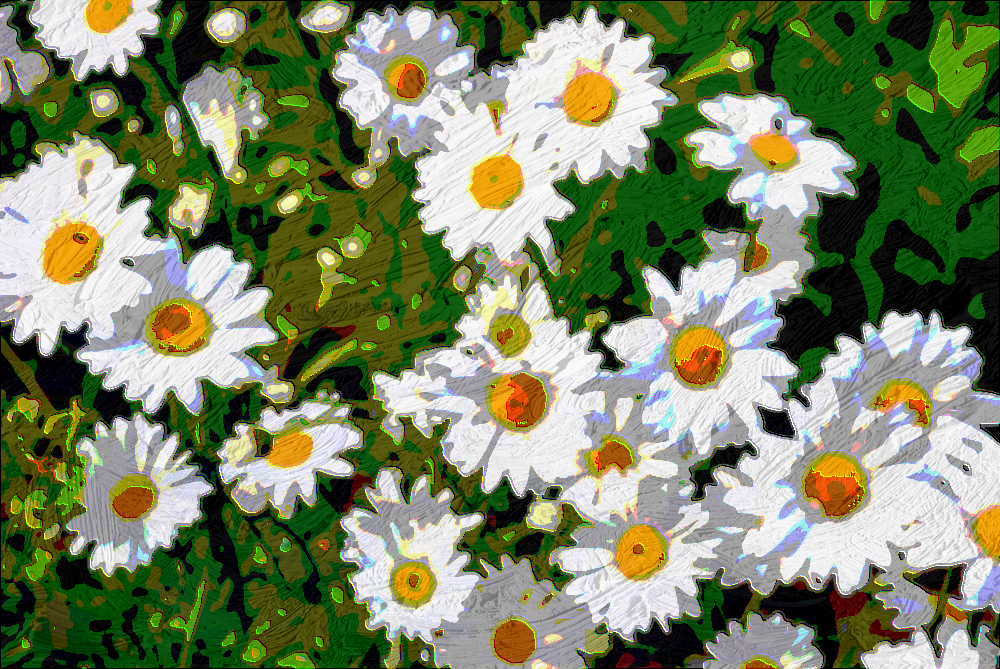

In [70]:
enhancer = ImageEnhance.Color(img42)
img43 = enhancer.enhance(1)
img43


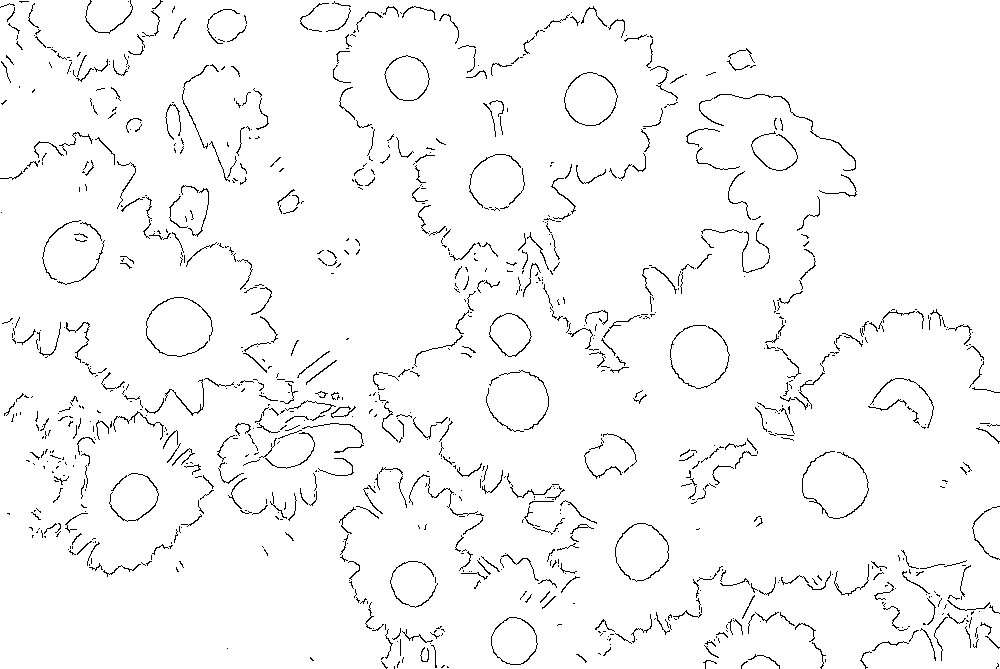

In [71]:
opencvImage = cv2.cvtColor(np.array(img0), cv2.COLOR_RGB2BGR)
edges = cv2.Canny(opencvImage, 150, 152)
pil_image = Image.fromarray(edges)
pil_image = ImageOps.invert(pil_image)
pil_image


In [72]:
# src_gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
# src_gray = cv.blur(src_gray, (3,3))
# canny_output = cv.Canny(src_gray, 30, 30 * 2)
# contours, hierarchy = cv.findContours(canny_output, cv.RETR_LIST, cv.CHAIN_APPROX_TC89_L1)


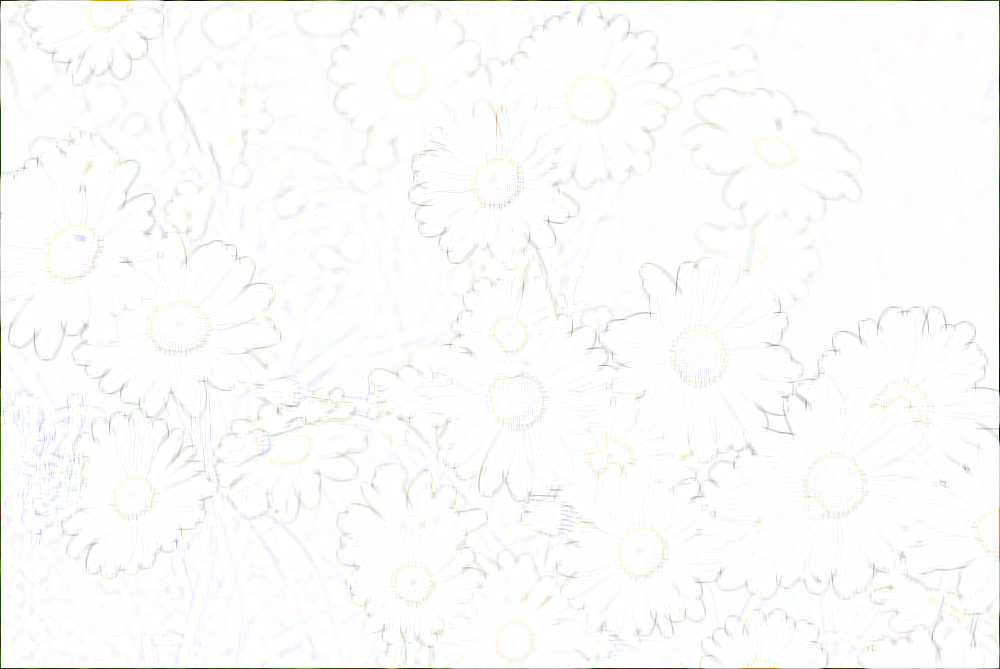

In [73]:
img61 = img0.filter(ImageFilter.CONTOUR)
img61


In [74]:
# img6 = img4.filter(ImageFilter.FIND_EDGES)
# threshold = 10
# img7 = img6.point(lambda p: p < threshold and 255)
# # img_arr.append(img7)
# img25 = img24.filter(ImageFilter.FIND_EDGES)
# threshold = 10
# img27 = img25.point(lambda p: p < threshold and 255)


In [76]:
img27 = img61.convert('1')
img27 = img27.convert('RGBA')


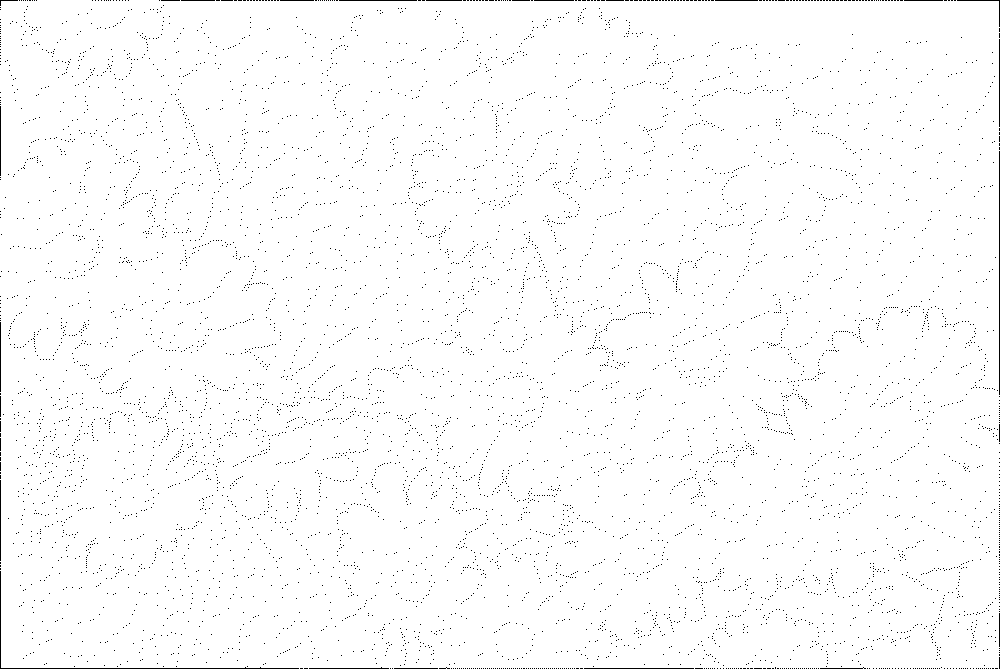

In [77]:
display(img27)


In [78]:
img27 = pil_image
img27 = img27.convert('RGBA')


In [79]:
px = img27.load()


In [80]:
x_line = []
y_line = []
for i in range(img4.size[0]):  # for every pixel:
    for j in range(img4.size[1]):
        if px[i, j][0] == 0:
            x_line.append(i)
            y_line.append(j)


In [81]:
line_new = []
xy_diff = abs(np.diff(x_line))+abs(np.diff(y_line)) + \
    abs(np.diff(np.multiply(y_line, x_line)))
for i in range(len(xy_diff)):
    line_new.append([xy_diff[i], [x_line[i], y_line[i]]])


In [82]:
line_new.sort(reverse=True)


In [83]:
canvas3 = canvas_.copy()
pixels3 = canvas3.load()
img_arr3 = []
kkk = 0


In [84]:
for i in range(len(line_new)):
    #     print(line_new[i][1][1])
    pixels3[line_new[i][1][0], line_new[i][1][1]] = (0, 0, 0, 255)
    if kkk in list(range(1, len(line_new), len(line_new)//50)):
        img_arr3.append(canvas3.copy())
    kkk += 1


In [85]:
img_arr1 = []
img_arr1.extend([img]*4)
img_arr1.extend([img27]*9)


In [86]:
colors_my = img4.getcolors()


In [88]:
# colors_my.sort(reverse = False)
# colors_my.sort(reverse = True)


In [89]:
intense_ = list(zip(*colors_my))[0]
# print(colors_my,'\n############\n',len(colors_my))


In [90]:
my_colors = list(list(zip(*colors_my))[1])


In [91]:
my_colors.insert(0, (0, 0, 0))
my_colors.insert(1, (0, 0, 0))


In [92]:
img41 = img42.copy().convert("RGBA")
pixels = img41.load()
pixels[6, 6]


(160, 157, 163, 255)

In [94]:
a = [(0, 0)]
# img_arr=[]
st = 80
kk = 0


In [95]:
colors_my[len(colors_my)-1][0]


73682

In [96]:
pixels_canvas = canvas_.copy().load()


In [97]:
count_t = 0
img_arr = []
img71 = canvas_
# pixels_canvas = canvas_.load()
img41 = img42.copy().convert("RGBA")
img43 = img42.copy().convert("RGBA")
pixels3 = img4.load()  # create the pixel map
pixels = img41.load()  # create the pixel map
for k in list(zip(*colors_my))[1]:
    kkk = 0
    for i in range(img4.size[0]):  # for every pixel:
        for j in range(img4.size[1]):
            if pixels3[i, j][0:3] == k:
                # change to black if not red
                pixels[i, j] = pixels_canvas[i, j]
                if kkk in list(range(0, colors_my[len(colors_my)-1][0], colors_my[len(colors_my)-1][0]//15)):
                    if count_t == 0:
                        canvas_.paste(img41, (0, 0), img41)
                        img71 = canvas_
                    img71.paste(img41, (0, 0), img41)
                    img_arr.append(img71.convert("RGB"))
                kkk += 1
#     print('############\n',k,'------------------\n')
#     if count_t==0:
#         canvas_.paste(img41, (0, 0), img41)
#         img71=canvas_

#     img71.paste(img41, (0, 0), img41)
#     img_arr.append(img71.convert("RGB"))

    count_t += 1


## 

In [98]:
len(img_arr)


125

In [99]:
img_arr.reverse()
# img_arr1=[]


In [100]:
img_arr1.extend(img_arr3)
img_arr1.extend(img_arr)
# img_arr.reverse()
img_arr1[0].save(src_+'.gif', format='GIF',
                 append_images=img_arr1[1:], save_all=True, duration=50, loop=0)


In [101]:
videodims = img_arr1[0].size
fourcc = cv2.VideoWriter_fourcc(*'avc1')
video = cv2.VideoWriter(src_+".mp4", fourcc, len(img_arr1)//12, videodims)
# draw stuff that goes on every frame here
for i in img_arr1:
    imtemp = i
    # draw frame specific stuff here.
    video.write(cv2.cvtColor(np.array(imtemp), cv2.COLOR_RGB2BGR))
video.release()


In [113]:
from google.colab import files
files.download('out.gif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>